## Let's look at some penguins !

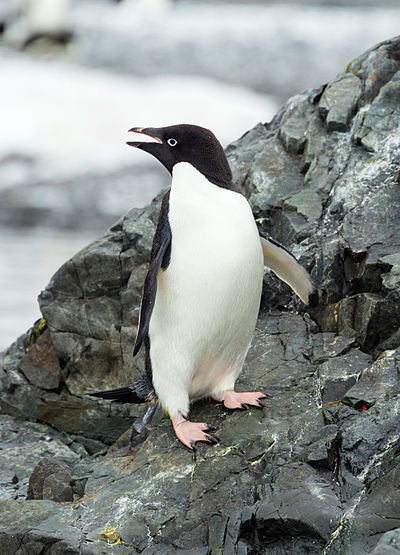

In [20]:
#Import library
library("IRdisplay")
display_png(file = "adelie.png", width = 300, height = 600)

Adélie penguin (*Pygoscelis adeliae*), Hope Bay, Trinity Peninsula, on the northernmost tip of the Antarctic Peninsula. **Photos by Andrew Shiva / Wikipedia / CC BY-SA 4.0**

In [24]:
install.packages("remotes")
remotes::install_github("allisonhorst/palmerpenguins",force = TRUE)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done




✔  checking for file ‘/private/var/folders/gg/nsw1ch1136s7x40k9s739cyh0000gn/T/RtmpdJEJ4O/remotesc58b70ab086a/allisonhorst-palmerpenguins-72e0b43/DESCRIPTION’ (442ms)
─  preparing ‘palmerpenguins’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘palmerpenguins_0.1.0.tar.gz’
   


Once loaded, we can look at one of the data frames present

In [30]:
library(palmerpenguins)

In [31]:
names(penguins)

[1] "species"           "island"            "bill_length_mm"   
[4] "bill_depth_mm"     "flipper_length_mm" "body_mass_g"      
[7] "sex"

In [32]:
levels(penguins$species)

[1] "Adelie"    "Chinstrap" "Gentoo"

In [33]:
tapply(penguins$body_mass_g[penguins$species=="Adelie"],penguins$sex[penguins$species=="Adelie"],shapiro.test)

$female

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.97684, p-value = 0.1985


$male

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.98269, p-value = 0.416



# We fail to reject the null hypotheses for the two Shapiro-Wilks tests

In [34]:
var.test(penguins$body_mass_g[penguins$species=="Adelie"]~penguins$sex[penguins$species=="Adelie"])


	F test to compare two variances

data:  penguins$body_mass_g[penguins$species == "Adelie"] by penguins$sex[penguins$species == "Adelie"]
F = 0.60331, num df = 72, denom df = 72, p-value = 0.03356
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3787186 0.9611059
sample estimates:
ratio of variances 
         0.6033147 


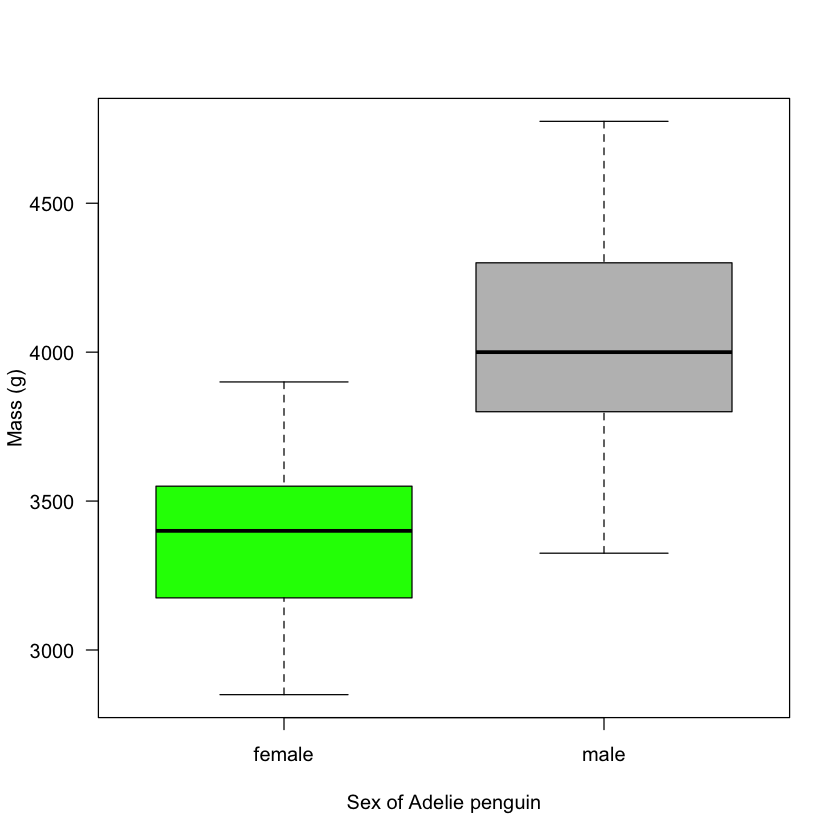

In [35]:
plot(penguins$body_mass_g[penguins$species=="Adelie"]~penguins$sex[penguins$species=="Adelie"],col=c("green","grey"),las=1,ylab="Mass (g)",xlab="Sex of Adelie penguin")

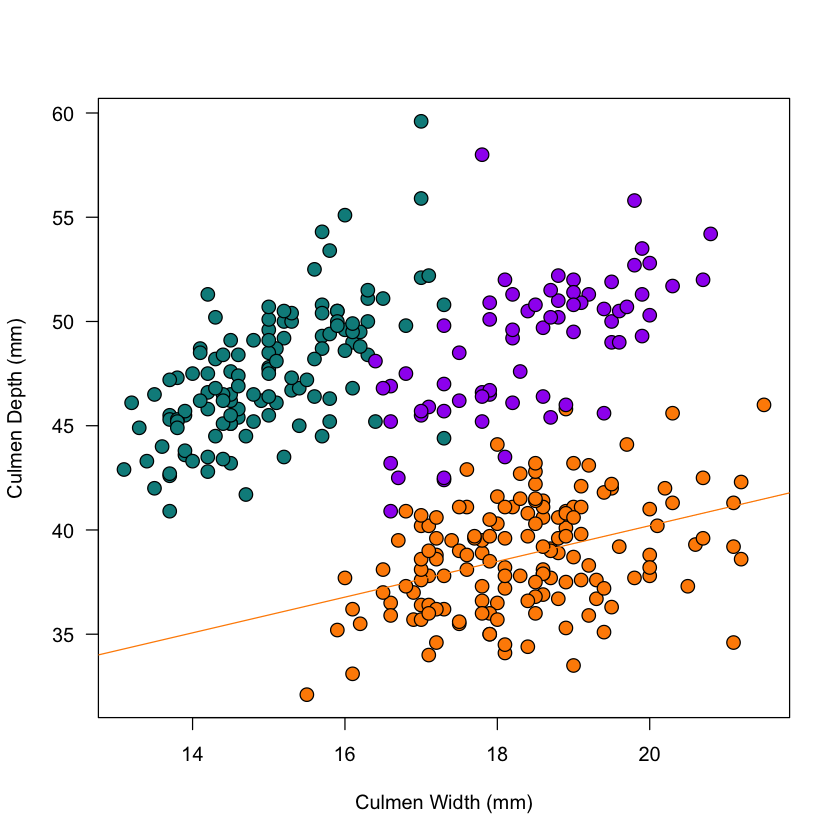

In [36]:
#Simple plot of the three species
plot(penguins$bill_length_mm~penguins$bill_depth_mm,pch=21,cex = 1.5,bg=c("darkorange","purple","cyan4")[unclass(penguins$species)],xlab="Culmen Width (mm)",ylab="Culmen Depth (mm)",las=1)
abline(lm(penguins$bill_length_mm[penguins$species=="Adelie"]~penguins$bill_depth_mm[penguins$species=="Adelie"]),col="darkorange")

*_We can run statistical tests and look at the output_*

In [37]:
summary.aov(lm(penguins$bill_length_mm~penguins$species*penguins$bill_depth_mm))

                                         Df Sum Sq Mean Sq F value  Pr(>F)    
penguins$species                          2   7194    3597  601.90 < 2e-16 ***
penguins$bill_depth_mm                    1    828     828  138.47 < 2e-16 ***
penguins$species:penguins$bill_depth_mm   2    134      67   11.23 1.9e-05 ***
Residuals                               336   2008       6                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
2 observations deleted due to missingness

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


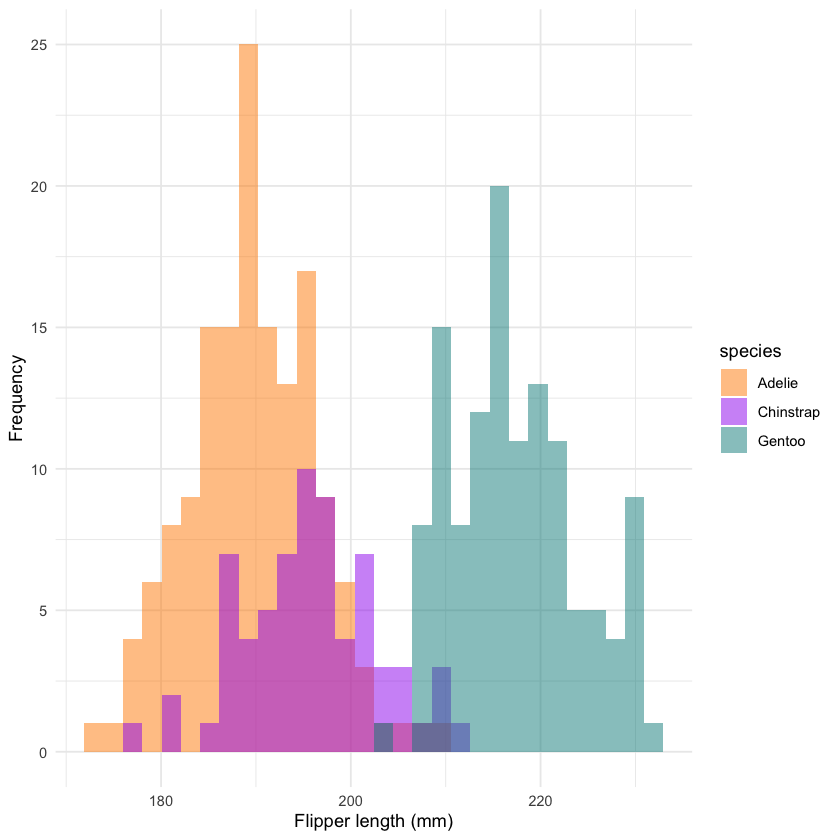

In [42]:
library(ggplot2)
flipper_hist <- ggplot(data = penguins, aes(x = flipper_length_mm)) +
  geom_histogram(aes(fill = species), 
                 alpha = 0.5, 
                 position = "identity") +
  scale_fill_manual(values = c("darkorange","purple","cyan4")) +
  theme_minimal() +
  labs(x = "Flipper length (mm)",
       y = "Frequency")
flipper_hist